In [165]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

In [166]:
#Διάβασμα του αρχείου CSV

In [167]:
df = pd.read_csv('pl.csv')

In [168]:
df['Date'] = pd.to_datetime(df.Date)
df.sort_values('Date').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
3837,2008,2007-01-09,Bolton,Everton,1,2,A,0,1,A,...,7,11,8,10,11,6,1,3,0,0
3839,2008,2007-01-09,Liverpool,Derby,6,0,H,2,0,H,...,10,3,10,14,4,2,0,1,0,0
3840,2008,2007-01-09,Man United,Sunderland,1,0,H,0,0,D,...,9,1,10,7,6,0,1,2,0,0


In [169]:
#Έλεγχος null καταχωρήσεων σε 3 φάσεις

In [170]:
df.isnull().values.any()

False

In [171]:
df.isnull().sum()

Season      0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [213]:
df.isnull().sum().sum()

0

In [214]:
# DATASET INFO

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 24 columns):
Season        4180 non-null int64
Date          4180 non-null datetime64[ns]
HomeTeam      4180 non-null object
AwayTeam      4180 non-null object
FTHG          4180 non-null int64
FTAG          4180 non-null int64
FTR           4180 non-null object
HTHG          4180 non-null int64
HTAG          4180 non-null int64
HTR           4180 non-null object
Referee       4180 non-null object
HS            4180 non-null int64
AS            4180 non-null int64
HST           4180 non-null int64
AST           4180 non-null int64
HF            4180 non-null int64
AF            4180 non-null int64
HC            4180 non-null int64
AC            4180 non-null int64
HY            4180 non-null int64
AY            4180 non-null int64
HR            4180 non-null int64
AR            4180 non-null int64
totalGoals    4180 non-null int64
dtypes: datetime64[ns](1), int64(18), object(5)
memory usage: 7

In [225]:
#OI ΟΜΑΔΕΣ ΠΟΥ ΕΧΟΥΝ ΑΓΩΝΙΣΤΕΙ ΣΤΗΝ ΠΡΕΜΙΕΡ ΛΙΓΚ
df['HomeTeam'].unique()

array(['Stoke', 'Chelsea', 'Arsenal', 'Bournemouth', 'Huddersfield',
       'Newcastle', 'Southampton', 'West Ham', 'Everton', 'Man United',
       'West Brom', 'Man City', 'Swansea', 'Tottenham', 'Leicester',
       'Brighton', 'Watford', 'Burnley', 'Crystal Palace', 'Liverpool',
       'Hull', 'Middlesbrough', 'Sunderland', 'Norwich', 'Aston Villa',
       'QPR', 'Fulham', 'Cardiff', 'Reading', 'Wigan', 'Wolves',
       'Blackburn', 'Bolton', 'Birmingham', 'Blackpool', 'Portsmouth',
       'Derby'], dtype=object)

In [226]:
# Ο ΑΡΙΘΜΟΣ ΤΩΝ ΟΜΑΔΩΝ ΠΟΥ ΕΧΟΥΝ ΑΓΩΝΙΣΤΕΙ ΣΤΗΝ ΠΡΕΜΙΕΡ ΛΙΓΚ
df['HomeTeam'].nunique()

37

In [173]:
# Σορτάρισμα ανά Season, έτσι ώστε στην κορυφή να είναι η τελευταία σαιζόν & reset Index

In [174]:
df = df.sort_values(['Season', 'Date'], ascending=False).reset_index(drop=True)
df.head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2018,2018-12-03,Stoke,Man City,0,2,A,0,1,A,...,0,6,6,8,3,10,1,0,0,0
1,2018,2018-12-02,Chelsea,West Brom,3,0,H,1,0,H,...,8,1,11,11,8,7,0,2,0,0
2,2018,2018-11-03,Arsenal,Watford,3,0,H,1,0,H,...,7,4,12,9,4,9,2,1,0,0


In [175]:
# Προσθήκη στήλης totalGoals με το σύνολο των γκολ ανα αγώνα.

In [176]:
df['totalGoals'] = df['FTHG'] + df['FTAG']

In [177]:
# Εμφάνιση των 3 πρώτων γραμμών

In [178]:
df.head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
0,2018,2018-12-03,Stoke,Man City,0,2,A,0,1,A,...,6,6,8,3,10,1,0,0,0,2
1,2018,2018-12-02,Chelsea,West Brom,3,0,H,1,0,H,...,1,11,11,8,7,0,2,0,0,3
2,2018,2018-11-03,Arsenal,Watford,3,0,H,1,0,H,...,4,12,9,4,9,2,1,0,0,3


In [179]:
# Εμφάνιση των 3 τελευταίων γραμμών

In [180]:
df.tail(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
4177,2008,2007-01-09,Middlesbrough,Birmingham,2,0,H,2,0,H,...,4,8,12,11,5,1,3,0,0,2
4178,2008,2007-01-09,Newcastle,Wigan,1,0,H,0,0,D,...,6,15,18,9,1,2,4,0,1,1
4179,2008,2007-01-09,Reading,West Ham,0,3,A,0,1,A,...,9,10,11,14,4,0,1,0,0,3


In [181]:
# Έλεγχος μοναδικών σαιζόν

In [182]:
df['Season'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008])

In [183]:
# Εμφάνιση συνόλου των μοναδικών σαιζόν στο dataset.

In [184]:
df['Season'].nunique()

11

### Εμφάνιση του συνόλου των αγώνων ανά σαιζόν

In [185]:
df['Season'].value_counts().sort_index()

2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    380
2017    380
2018    380
Name: Season, dtype: int64

### Σύνολο γκολ ανα σαιζόν

In [186]:
#df.groupby('Season').sum().reset_index()
#df2 = df.groupby('Season').sum().reset_index()
df2 = df.groupby(['Season'])[["totalGoals"]].sum().reset_index()
#df2.sort_values('totalGoals', ascending=False)
df2

,Season,totalGoals
0,2008,1002
1,2009,942
2,2010,1053
3,2011,1063
4,2012,1066
5,2013,1063
6,2014,1052
7,2015,975
8,2016,1026
9,2017,1064


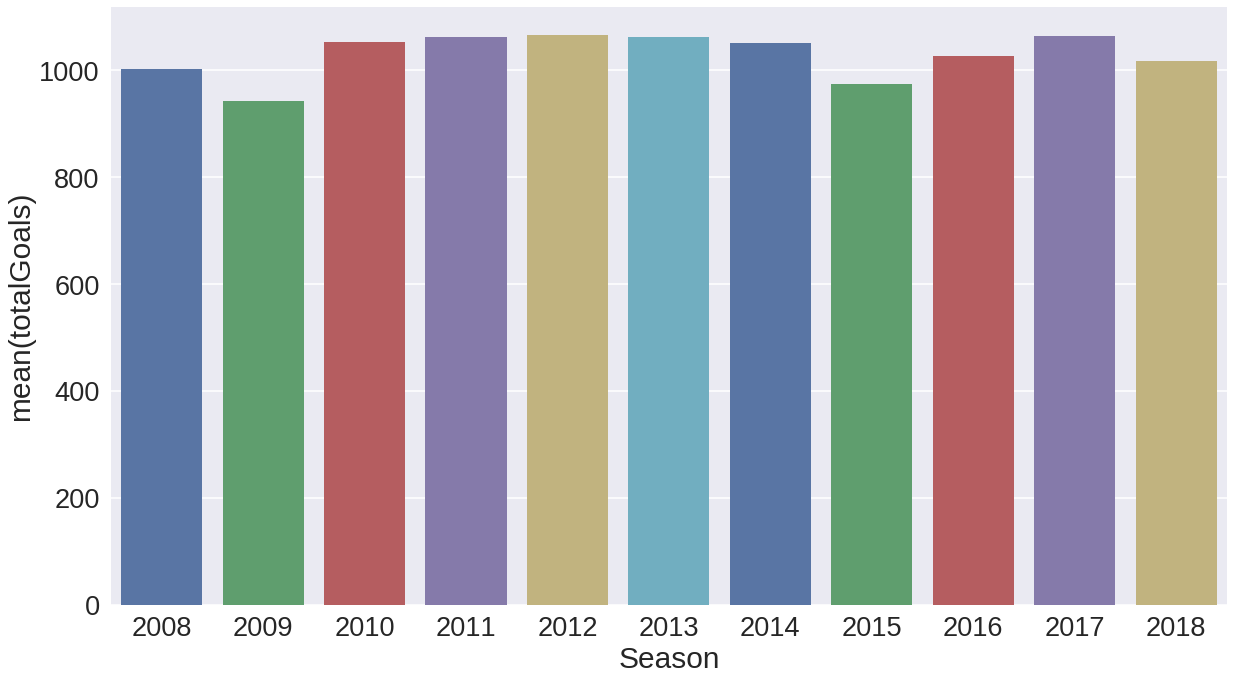

In [187]:
plt.figure(figsize=(20,11))
sns.set_context('poster',font_scale=1.7)
sns.barplot(x='Season', y='totalGoals', data=df2, palette="deep")

### Μέσος όρος των γκολ ανα σαιζόν

In [188]:
# ΠΕΡΙΛΑΜΒΑΝΕΤΑΙ ΤΑΞΙΝΟΜΗΣΗ ΤΟΥ ΑΠΟΤΕΛΕΣΜΑΤΟΣ. ΣΤΗΝ ΚΟΡΥΦΗ ΒΡΙΣΚΕΤΑΙ Η ΣΑΙΖΟΝ ΠΟΥ ΕΙΧΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΜΕΣΟ ΟΡΟ ΓΚΟΛ.
# ΣΤΗ ΣΥΓΚΕΚΡΙΜΕΝΗ ΠΕΡΙΠΤΩΣΗ Η ΣΑΙΖΟΝ 2011-12 ΕΙΧΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΜΕΣΟ ΟΡΟ ΓΚΟΛ ΜΕ 2,81 ΓΚΟΛ ΑΝΑ ΑΓΩΝΑ
df3 = df.groupby(['Season'])[["totalGoals","HS"]].mean().reset_index()
#df3.sort_values('totalGoals', ascending=False)
df3

,Season,totalGoals,HS
0,2008,2.64,12.85
1,2009,2.48,13.65
2,2010,2.77,13.73
3,2011,2.80,13.80
4,2012,2.81,14.53
5,2013,2.80,14.12
6,2014,2.77,14.96
7,2015,2.57,14.62
8,2016,2.70,14.31
9,2017,2.80,14.01


In [189]:
plt.figure(figsize=(20,11))
sns.set_context('poster',font_scale=1.7)
#sns.barplot(x='Season', y='totalGoals', data=df3, palette="colorblind")

### Σύνολο των γκολ όλων των σαιζόν

In [190]:
df['totalGoals'].sum()

11324

### Μέσος όρος γκολ όλων των σαιζόν

In [191]:
df['totalGoals'].mean()

2.709090909090909

### Αγώνες με περισσότερα από 5 γκολ, για την ομάδα εντός έδρας

In [192]:
df.query('FTHG >= 5').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
16,2018,2018-10-02,Man City,Leicester,5,1,H,1,1,D,...,2,10,12,8,2,2,3,0,0,6
36,2018,2018-06-05,Arsenal,Burnley,5,0,H,2,0,H,...,2,6,7,4,5,0,1,0,0,5
47,2018,2018-05-13,Tottenham,Leicester,5,4,H,1,2,A,...,9,9,13,4,4,1,2,0,0,9


### Αγώνες με περισσότερα από 5 γκολ, για την ομάδα εκτός έδρας

In [193]:
df.query('FTAG >= 5').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
269,2018,2017-10-22,Everton,Arsenal,2,5,A,1,1,D,...,14,14,14,0,7,1,1,1,0,7
318,2018,2017-09-16,Watford,Man City,0,6,A,0,3,A,...,10,8,6,3,11,2,0,0,0,6
370,2018,2017-02-12,Brighton,Liverpool,1,5,A,0,2,A,...,6,8,7,2,2,1,0,0,0,6


### Εμφάνιση των εντός έδρας αγώνων συγκεκριμένης ομάδας - Function

In [194]:
# df.loc[(df['HomeTeam'] == 'Liverpool' )]
home_team = lambda x: df.loc[(df['HomeTeam'] == x)]

In [195]:
home_team('Liverpool').head(2)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
42,2018,2018-05-13,Liverpool,Brighton,4,0,H,2,0,H,...,1,3,6,7,3,0,0,0,0,4
63,2018,2018-04-28,Liverpool,Stoke,0,0,D,0,0,D,...,1,7,14,9,2,1,2,0,0,0


### Εμφάνιση των εκτός έδρας αγώνων συγκεκριμένεης ομάδας - Function

In [196]:
# df.loc[(df['HomeTeam'] == 'Leicester' )]
away_team = lambda x: df.loc[(df['AwayTeam'] == x)]

In [197]:
away_team('Chelsea').head(4)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
44,2018,2018-05-13,Newcastle,Chelsea,3,0,H,1,0,H,...,2,11,10,4,2,0,1,0,0,3
56,2018,2018-05-02,Watford,Chelsea,4,1,H,1,0,H,...,3,11,8,6,2,2,2,0,1,5
66,2018,2018-04-28,Swansea,Chelsea,0,1,A,0,1,A,...,3,13,9,1,2,1,1,0,0,1
73,2018,2018-04-19,Burnley,Chelsea,1,2,A,0,1,A,...,5,9,11,3,2,1,0,0,0,3


### Εμφάνιση όλων των αγώνων συγκεκριμένης ομάδας & συγκεκριμένης σαιζόν

In [198]:
#df.query('HomeTeam == "Liverpool" | AwayTeam == "Liverpool" ')
df.loc[((df['HomeTeam'] == 'Liverpool') | (df['AwayTeam'] == 'Liverpool')) & (df['Season'] == 2016 ) ].head(4)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
766,2016,2016-11-05,Liverpool,Chelsea,1,1,D,0,1,A,...,7,11,12,7,3,3,1,0,0,2
770,2016,2016-10-04,Liverpool,Stoke,4,1,H,2,1,H,...,3,14,14,6,3,0,2,0,0,5
780,2016,2016-08-05,Liverpool,Watford,2,0,H,1,0,H,...,3,10,15,8,8,1,2,0,0,2
792,2016,2016-06-03,Crystal Palace,Liverpool,1,2,A,0,0,D,...,5,12,16,6,6,1,2,0,1,3


### Εμφάνιση των αγώνων συγκεκριμένης ημερομηνίας - Function

In [199]:
#df.loc[(df['Date'] == '24/09/16' )]
specific_date = lambda x: df.loc[(df['Date'] == x )]

In [200]:
specific_date('24/09/16')

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
683,2017,2016-09-24,Arsenal,Chelsea,3,0,H,3,0,H,...,2,9,11,9,1,0,2,0,0,3
684,2017,2016-09-24,Bournemouth,Everton,1,0,H,1,0,H,...,2,10,14,5,3,2,2,0,0,1
685,2017,2016-09-24,Liverpool,Hull,5,1,H,3,0,H,...,1,8,8,13,2,1,2,0,1,6
686,2017,2016-09-24,Man United,Leicester,4,1,H,4,0,H,...,3,9,12,8,6,0,2,0,0,5
687,2017,2016-09-24,Middlesbrough,Tottenham,1,2,A,0,2,A,...,5,14,9,2,10,2,1,0,0,3
688,2017,2016-09-24,Stoke,West Brom,1,1,D,0,0,D,...,3,9,13,6,6,3,4,0,0,2
689,2017,2016-09-24,Sunderland,Crystal Palace,2,3,A,1,0,H,...,4,15,12,3,5,0,2,0,0,5
690,2017,2016-09-24,Swansea,Man City,1,3,A,1,1,D,...,4,15,9,2,7,2,4,0,0,4


### Εμφάνιση των αγώνων μεταξύ 2 συγεκριμένων ομάδων.

In [201]:
#df.loc[(df['HomeTeam'] == 'Liverpool' & ['AwayTeam'] == 'Leicester')]
#df.query('HomeTeam == "Liverpool" & AwayTeam == "Hull" ')
home_away = lambda x,y: df.loc[(df['HomeTeam'] == x) & (df['AwayTeam'] == y)]

In [202]:
home_away('Hull','Liverpool')

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
495,2017,2017-04-02,Hull,Liverpool,2,0,H,1,0,H,...,5,9,12,1,15,2,1,0,0,2
1216,2015,2015-04-28,Hull,Liverpool,1,0,H,1,0,H,...,9,10,10,7,7,2,0,0,0,1
1894,2014,2013-01-12,Hull,Liverpool,3,1,H,1,1,D,...,4,10,16,2,6,2,0,0,0,4
3060,2010,2010-09-05,Hull,Liverpool,0,0,D,0,0,D,...,7,15,11,2,6,1,0,0,0,0
3489,2009,2009-04-25,Hull,Liverpool,1,3,A,0,1,A,...,8,15,14,3,8,3,1,1,0,4


### Σύνολο αγώνων που σφύριξε ο κάθε διαιτητής ξεχωριστά

In [203]:
df['Referee'].value_counts().head(5)

M Dean           321
M Atkinson       301
A Marriner       267
M Clattenburg    233
L Mason          226
Name: Referee, dtype: int64

In [204]:
#df.drop(['Date','Season'], axis=1)
#df[[i for i in list(df.columns) if i != 'HomeTeam']]
#df[['HomeTeam','AwayTeam']]

In [205]:
df.columns

Index(['Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'totalGoals'],
      dtype='object')

In [206]:
df.index

RangeIndex(start=0, stop=4180, step=1)

In [207]:
df.head(4)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
0,2018,2018-12-03,Stoke,Man City,0,2,A,0,1,A,...,6,6,8,3,10,1,0,0,0,2
1,2018,2018-12-02,Chelsea,West Brom,3,0,H,1,0,H,...,1,11,11,8,7,0,2,0,0,3
2,2018,2018-11-03,Arsenal,Watford,3,0,H,1,0,H,...,4,12,9,4,9,2,1,0,0,3
3,2018,2018-11-03,Bournemouth,Tottenham,1,4,A,1,1,D,...,8,10,7,4,5,1,1,0,0,5


In [208]:
#df['Color'] = np.where(df['HomeTeam']=='Liverpool', 'green', 'red')
def set_color(row):
    if row["HomeTeam"] == "Liverpool" or row["AwayTeam"] == "Liverpool":
        return "red"
    else:
        return "green"

df2 = df.assign(color=df.apply(set_color, axis=1))

In [209]:
df2.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals,color
0,2018,2018-12-03,Stoke,Man City,0,2,A,0,1,A,...,6,8,3,10,1,0,0,0,2,green
1,2018,2018-12-02,Chelsea,West Brom,3,0,H,1,0,H,...,11,11,8,7,0,2,0,0,3,green
2,2018,2018-11-03,Arsenal,Watford,3,0,H,1,0,H,...,12,9,4,9,2,1,0,0,3,green
3,2018,2018-11-03,Bournemouth,Tottenham,1,4,A,1,1,D,...,10,7,4,5,1,1,0,0,5,green
4,2018,2018-11-02,Huddersfield,Bournemouth,4,1,H,2,1,H,...,12,12,2,6,0,3,0,0,5,green


array(['Stoke', 'Chelsea', 'Arsenal', 'Bournemouth', 'Huddersfield',
       'Newcastle', 'Southampton', 'West Ham', 'Everton', 'Man United',
       'West Brom', 'Man City', 'Swansea', 'Tottenham', 'Leicester',
       'Brighton', 'Watford', 'Burnley', 'Crystal Palace', 'Liverpool',
       'Hull', 'Middlesbrough', 'Sunderland', 'Norwich', 'Aston Villa',
       'QPR', 'Fulham', 'Cardiff', 'Reading', 'Wigan', 'Wolves',
       'Blackburn', 'Bolton', 'Birmingham', 'Blackpool', 'Portsmouth',
       'Derby'], dtype=object)

In [217]:
df['HomeTeam'].value_counts().sort_index()

Arsenal           209
Aston Villa       171
Birmingham         57
Blackburn          95
Blackpool          19
Bolton             95
Bournemouth        57
Brighton           19
Burnley            76
Cardiff            19
Chelsea           209
Crystal Palace     95
Derby              19
Everton           209
Fulham            133
Huddersfield       19
Hull               95
Leicester          76
Liverpool         209
Man City          209
Man United        209
Middlesbrough      57
Newcastle         171
Norwich            76
Portsmouth         57
QPR                57
Reading            38
Southampton       114
Stoke             190
Sunderland        190
Swansea           133
Tottenham         209
Watford            57
West Brom         171
West Ham          190
Wigan             114
Wolves             57
Name: HomeTeam, dtype: int64

In [218]:
pd.DataFrame({'team':teams.index, 'games':teams.values})

,games,team
0,209,Arsenal
1,171,Aston Villa
2,57,Birmingham
3,95,Blackburn
4,19,Blackpool
5,95,Bolton
6,57,Bournemouth
7,19,Brighton
8,76,Burnley
9,19,Cardiff
